# Exploring precision and recall

In [2]:
import graphlab
import pandas as pd
import numpy as np
from __future__ import division

# Load amazon review dataset

In [3]:
products = graphlab.SFrame("E:\\Machine Learning\\U.W\\Classification\\amazon_baby.gl/")
products.save("E:\\Machine Learning\\U.W\\Classification\\amazon_baby.csv", format="csv")
products = pd.read_csv("E:\\Machine Learning\\U.W\\Classification\\amazon_baby.csv")

This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1559493150.log.0


In [4]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Extract word counts and sentiments

In [5]:
def remove_punctuation(text):
    import string
    
    for punc in string.punctuation:
        text = text.replace(punc, "")
        
    return text

In [6]:
products["review"].fillna("0", inplace=True)

In [7]:
products["review_no_punc"] = products["review"].apply(remove_punctuation)

In [8]:
products.head()

,name,review,rating,review_no_punc
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


In [11]:
def word_count(text):
    words = {}
    
    words_list = text.split()
    for i in range(len(words_list)):
        if words_list[i] in words:
            words[words_list[i]] += 1
        else:
            words[words_list[i]] = 1
            
            
    return words

In [12]:
products["word_count"] = products["review_no_punc"].apply(word_count)

In [13]:
products.head()

,name,review,rating,review_no_punc,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,"{u'and': 5, u'stink': 1, u'months': 1, u'order..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{u'and': 3, u'love': 1, u'it': 3, u'highly': 1..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{u'and': 2, u'all': 1, u'help': 1, u'cried': 1..."


In [14]:
# Drop neutral sentiment reviews.
products = products[products["rating"] != 3]

In [15]:
products["sentiment"] = products["rating"].apply(lambda rating: +1 if rating > 3 else -1)

In [20]:
products

,name,review,rating,review_no_punc,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{u'and': 3, u'love': 1, u'it': 3, u'highly': 1...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{u'and': 2, u'all': 1, u'help': 1, u'cried': 1...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,"{u'and': 2, u'cute': 1, u'would': 1, u'help': ...",1
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4,Lovely book its bound tightly so you may not b...,"{u'Barnes': 1, u'is': 1, u'bound': 1, u'as': 1...",1
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,Perfect for new parents We were able to keep t...,"{u'Perfect': 1, u'and': 2, u'all': 1, u'would'...",1
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...,"{u'and': 1, u'fantastic': 1, u'help': 1, u'Pin...",1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,"{u'homeThe': 1, u'all': 1, u'because': 1, u'an...",1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,"{u'all': 1, u'nannys': 1, u'just': 1, u'sleep'...",1


## Split data into training and test sets

In [22]:
products = products.reset_index(drop=True)

In [23]:
products.head()

,name,review,rating,review_no_punc,word_count,sentiment
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{u'and': 3, u'love': 1, u'it': 3, u'highly': 1...",1
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{u'and': 2, u'quilt': 1, u'it': 1, u'comfortab...",1
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{u'and': 3, u'ingenious': 1, u'What': 1, u'lov...",1
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{u'and': 2, u'all': 1, u'help': 1, u'cried': 1...",1
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,"{u'and': 2, u'cute': 1, u'would': 1, u'help': ...",1


To save time, we only use the first 1000 observations.

In [25]:
train_data_1000_df, test_data_1000_df = train_test_split(products.iloc[:1000, :], test_size=0.2, random_state=42)

print len(train_data_1000_df)
print len(test_data_1000_df)

products_1000_df = train_data_1000_df.append(test_data_1000_df)

print len(products_1000_df)

800
200
1000


In [26]:
products_1000_df.head()

,name,review,rating,review_no_punc,word_count,sentiment
29,"Lamaze Peekaboo, I Love You",The book is colorful and is perfect for 6month...,4,The book is colorful and is perfect for 6month...,"{u'and': 2, u'andor': 1, u'is': 2, u'6months':...",1
535,Baby Trend Diaper Champ,My baby is now 8 months and the can has been h...,5,My baby is now 8 months and the can has been h...,"{u'able': 2, u'over': 1, u'soon': 1, u'its': 1...",1
695,Odorless Diaper Pail by Safety 1st,This diaper pail remained odorless for approxi...,1,This diaper pail remained odorless for approxi...,"{u'remained': 1, u'process': 1, u'is': 1, u'am...",-1
557,Baby Trend Diaper Champ,The Diaper Champ was recommended to us in the ...,4,The Diaper Champ was recommended to us in the ...,"{u'lysol': 1, u'all': 2, u'just': 2, u'less': ...",1
836,Hospital's Choice Fold Up Nail Clippers,This nail cutter originally came to us in a ba...,5,This nail cutter originally came to us in a ba...,"{u'and': 4, u'set': 1, u'ordered': 1, u'just':...",1


In [27]:
products_1000_df = products_1000_df.reset_index(drop=True)

In [28]:
products_1000_df.head()

,name,review,rating,review_no_punc,word_count,sentiment
0,"Lamaze Peekaboo, I Love You",The book is colorful and is perfect for 6month...,4,The book is colorful and is perfect for 6month...,"{u'and': 2, u'andor': 1, u'is': 2, u'6months':...",1
1,Baby Trend Diaper Champ,My baby is now 8 months and the can has been h...,5,My baby is now 8 months and the can has been h...,"{u'able': 2, u'over': 1, u'soon': 1, u'its': 1...",1
2,Odorless Diaper Pail by Safety 1st,This diaper pail remained odorless for approxi...,1,This diaper pail remained odorless for approxi...,"{u'remained': 1, u'process': 1, u'is': 1, u'am...",-1
3,Baby Trend Diaper Champ,The Diaper Champ was recommended to us in the ...,4,The Diaper Champ was recommended to us in the ...,"{u'lysol': 1, u'all': 2, u'just': 2, u'less': ...",1
4,Hospital's Choice Fold Up Nail Clippers,This nail cutter originally came to us in a ba...,5,This nail cutter originally came to us in a ba...,"{u'and': 4, u'set': 1, u'ordered': 1, u'just':...",1


In [33]:
df_new = products_1000_df["word_count"].apply(pd.Series).stack()
df_new = df_new.reset_index()
df_new.columns = ["id", "feature", "value"]

In [34]:
df_new

,id,feature,value
0,0,6months,1.0
1,0,I,2.0
2,0,The,2.0
3,0,Then,1.0
4,0,and,2.0
5,0,andor,1.0
6,0,book,2.0
7,0,colorful,1.0
8,0,detergent,1.0
9,0,didnt,1.0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
f = LabelEncoder()
df_new_label = f.fit_transform(df_new["feature"])

df_new["feature_id"] = df_new_label

In [37]:
df_new

,id,feature,value,feature_id
0,0,6months,1.0,135
1,0,I,2.0,603
2,0,The,2.0,1090
3,0,Then,1.0,1092
4,0,and,2.0,1407
5,0,andor,1.0,1408
6,0,book,2.0,1768
7,0,colorful,1.0,2135
8,0,detergent,1.0,2535
9,0,didnt,1.0,2569


In [41]:
from scipy.sparse import csr_matrix

v = np.array(df_new["value"])
i = np.array(df_new["id"])
j = np.array(df_new["feature_id"])

row = df_new["id"].max() + 1
col = j.max() + 1

mat = csr_matrix((v, (i, j)), shape=(row, col))
features_toarray = mat.toarray()

In [42]:
features_toarray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
sentiment_toarray = np.array(products_1000_df["sentiment"])
sentiment_toarray = sentiment_toarray[:, None]

In [47]:
print features_toarray.shape
print sentiment_toarray.shape

(1000L, 7064L)
(1000L, 1L)


In [48]:
products_1000_array = np.hstack((features_toarray, sentiment_toarray))

In [49]:
print products_1000_array.shape

products_1000_array

(1000L, 7065L)


array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.]])

In [50]:
train_data_1000_arr = products_1000_array[:800, :]
test_data_1000_arr = products_1000_array[800:, :]

print len(train_data_1000_arr)
print len(test_data_1000_arr)

800
200


## Train a logistic regression classifier

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs").fit(train_data_1000_arr[:, :-1], train_data_1000_arr[:, -1])

In [52]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation

## Accuracy

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified data points}}{\mbox{# total data points}}
$$

In [55]:
def get_classification_accuracy(model, data, true_labels):
    predictions = model.predict(data)
    num_correct = sum(predictions == true_labels)
    accuracy = num_correct/len(data)
    
    return accuracy

In [58]:
accuracy = get_classification_accuracy(model, test_data_1000_arr[:, :-1], test_data_1000_df["sentiment"])

print "Test Accuracy: %s" % accuracy

Test Accuracy: 0.81


## Baseline: Majority class prediction

In [60]:
baseline = len(test_data[test_data["sentiment"] == 1])/len(test_data)

print "Baseline accuracy (majority class classifier): %s" % baseline

Baseline accuracy (majority class classifier): 0.84186381218


## Confusion Matrix

In [68]:
test_data_1000_df["prediction"] = model.predict(test_data_1000_arr[:, :-1])

In [69]:
test_data_1000_df

,name,review,rating,review_no_punc,word_count,sentiment,prediction
521,Baby Trend Diaper Champ,I just wanted to say that I love my Diaper Cha...,5,I just wanted to say that I love my Diaper Cha...,"{u'and': 1, u'feed': 1, u'love': 1, u'just': 1...",1,1.0
737,Safety 1st Power Strip Cover,My little one looooves plug ins. This product...,4,My little one looooves plug ins This product ...,"{u'all': 2, u'less': 1, u'moments': 1, u'despi...",1,-1.0
740,Safety 1st Grow with Me Portable Booster Seat,My first son got this booster when he was 2 ye...,5,My first son got this booster when he was 2 ye...,"{u'all': 1, u'they': 1, u'just': 1, u'reviewer...",1,1.0
660,"Summer Infant, Ultimate Training Pad - Twin Ma...",This is my second one and it works like a char...,5,This is my second one and it works like a char...,"{u'and': 2, u'dont': 1, u'backing': 1, u'is': ...",1,1.0
411,Baby Trend Diaper Champ,I am really disappointed with the Diaper Champ...,2,I am really disappointed with the Diaper Champ...,"{u'just': 1, u'grossOtherwise': 1, u'Babies': ...",-1,-1.0
678,Odorless Diaper Pail by Safety 1st,I liked the idea of this pail using regular ki...,1,I liked the idea of this pail using regular ki...,"{u'liked': 1, u'is': 2, u'idea': 1, u'Also': 1...",-1,1.0
626,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",The reviews that say this product is soft are ...,2,The reviews that say this product is soft are ...,"{u'and': 1, u'all': 2, u'old': 1, u'Somewhere'...",-1,-1.0
513,Baby Trend Diaper Champ,I had tried a Diaper Genie at a friend's house...,5,I had tried a Diaper Genie at a friends house ...,"{u'all': 3, u'seemed': 1, u'refills': 2, u'We'...",1,-1.0
859,Safety 1st Space Saver Fold-Up Bath Tub,We first saw this fold-up infant tub in the NI...,5,We first saw this foldup infant tub in the NIC...,"{u'infant': 3, u'just': 1, u'over': 1, u'washc...",1,1.0
136,Pedal Farm Tractor,We bought this tractor to accompany the traile...,5,We bought this tractor to accompany the traile...,"{u'and': 5, u'load': 1, u'love': 1, u'into': 1...",1,1.0


In [87]:
true_negatives = len(test_data_1000_df[(test_data_1000_df["sentiment"] == -1) & (test_data_1000_df["prediction"] == -1)])
false_positives = len(test_data_1000_df[(test_data_1000_df["sentiment"] == -1) & (test_data_1000_df["prediction"] == 1)])
false_negatives = len(test_data_1000_df[(test_data_1000_df["sentiment"] == 1) & (test_data_1000_df["prediction"] == -1)])
true_positives = len(test_data_1000_df[(test_data_1000_df["sentiment"] == 1) & (test_data_1000_df["prediction"] == 1)]) 

confusion_matrix = pd.DataFrame({"target_label": np.array([-1, -1, 1, 1]), "predicted_label": np.array([-1, 1, -1, 1]),
                                "count": np.array([true_negatives, false_positives, false_negatives, true_positives])})

In [91]:
confusion_matrix = confusion_matrix[["target_label", "predicted_label", "count"]]

In [92]:
confusion_matrix

,target_label,predicted_label,count
0,-1,-1,24
1,-1,1,27
2,1,-1,11
3,1,1,138


## Computing the cost of mistakes

In [93]:
cost_test = (100 * false_positives) + (1 * false_negatives)

print cost_test

2711


## Precision and Recall


$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$


$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

In [99]:
precision = true_positives /len(test_data_1000_df[test_data_1000_df["prediction"] == 1])

print "Precision on test data: %s" % precision

Precision on test data: 0.836363636364


In [101]:
recall = true_positives/len(test_data_1000_df[test_data_1000_df["sentiment"] == 1])

print "Recall on test data: %s" % recall

Recall on test data: 0.926174496644


# Precision-recall tradeoff

## Varying the threshold

In [102]:
def apply_threshold(probabilities, threshold):
    result = []
    
    for i in range(len(probabilities)):
        if probabilities[i] >= threshold:
            result.append(1)
        else:
            result.append(-1)
            
    
    return np.array(result)

In [114]:
probabilities = model.predict_proba(test_data_1000_arr[:, :-1])[:, 1]

predictions_with_default_threshold = apply_threshold(probabilities, 0.5)
predictions_with_high_threshold = apply_threshold(probabilities, 0.9)

In [115]:
print "Number of positive predicted reviews (threshold = 0.5): %s" % (predictions_with_default_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.5): 165


In [116]:
print "Number of positive predicted reviews (threshold = 0.9): %s" % (predictions_with_high_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.9): 118


## Exploring the associated precision and recall as the threshold varies

In [119]:
test_data_1000_df["prediction_default"] = predictions_with_default_threshold
test_data_1000_df["prediction_high"] = predictions_with_high_threshold

test_data_1000_df.head()

,name,review,rating,review_no_punc,word_count,sentiment,prediction,prediction_default,prediction_high
521,Baby Trend Diaper Champ,I just wanted to say that I love my Diaper Cha...,5,I just wanted to say that I love my Diaper Cha...,"{u'and': 1, u'feed': 1, u'love': 1, u'just': 1...",1,1.0,1,1
737,Safety 1st Power Strip Cover,My little one looooves plug ins. This product...,4,My little one looooves plug ins This product ...,"{u'all': 2, u'less': 1, u'moments': 1, u'despi...",1,-1.0,-1,-1
740,Safety 1st Grow with Me Portable Booster Seat,My first son got this booster when he was 2 ye...,5,My first son got this booster when he was 2 ye...,"{u'all': 1, u'they': 1, u'just': 1, u'reviewer...",1,1.0,1,1
660,"Summer Infant, Ultimate Training Pad - Twin Ma...",This is my second one and it works like a char...,5,This is my second one and it works like a char...,"{u'and': 2, u'dont': 1, u'backing': 1, u'is': ...",1,1.0,1,1
411,Baby Trend Diaper Champ,I am really disappointed with the Diaper Champ...,2,I am really disappointed with the Diaper Champ...,"{u'just': 1, u'grossOtherwise': 1, u'Babies': ...",-1,-1.0,-1,-1


In [141]:
# Threshold = 0.5
precision_with_default_threshold = len(test_data_1000_df[(test_data_1000_df["prediction_default"]==1)&(test_data_1000_df["sentiment"]==1)])/len(test_data_1000_df[test_data_1000_df["prediction_default"]==1]) 
recall_with_default_threshold = len(test_data_1000_df[(test_data_1000_df["prediction_default"]==1)&(test_data_1000_df["sentiment"]==1)])/len(test_data_1000_df[test_data_1000_df["sentiment"]==1])

# Threshold = 0.9
precision_with_high_threshold = len(test_data_1000_df[(test_data_1000_df["prediction_high"]==1)&(test_data_1000_df["sentiment"]==1)])/len(test_data_1000_df[test_data_1000_df["prediction_high"]==1])
recall_with_high_threshold = len(test_data_1000_df[(test_data_1000_df["prediction_high"]==1)&(test_data_1000_df["sentiment"]==1)])/len(test_data_1000_df[test_data_1000_df["sentiment"]==1])

In [145]:
print "Precision (threshold = 0.5): %s" % precision_with_default_threshold
print "Recall (threshold = 0.5)   : %s" % recall_with_default_threshold

Precision (threshold = 0.5): 0.836363636364
Recall (threshold = 0.5)   : 0.926174496644


In [146]:
print "Precision (threshold = 0.9): %s" % precision_with_high_threshold
print "Recall (threshold = 0.9)   : %s" % recall_with_high_threshold

Precision (threshold = 0.9): 0.915254237288
Recall (threshold = 0.9)   : 0.724832214765


## Precision-recall curve

In [147]:
threshold_values = np.linspace(0.5, 1, num=100)

print threshold_values

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

In [171]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [179]:
precision_all = []
recall_all = []

true_labels = test_data_1000_arr[:, -1]
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

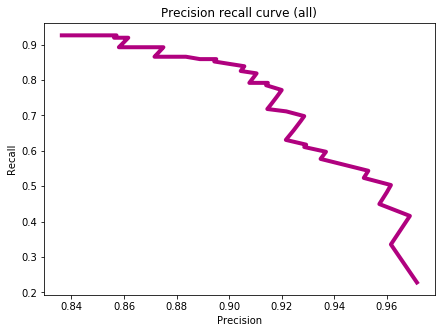

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all[:-1], recall_all[:-1], 'Precision recall curve (all)')

In [196]:
threshold_values[np.array(precision_all) >= 0.965].min()

0.9848484848484849

In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
threshold = 0.78

predictions = apply_threshold(probabilities, threshold)
confusion_matrix = confusion_matrix(true_labels, predictions)

confusion_matrix

array([[ 35,  16],
       [ 20, 129]], dtype=int64)